#Simple linear regression 

In [1]:
# Import library
import pandas  as pd #Data manipulation
import matplotlib.pyplot as plt # Visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
# salary and workexperience data
df =pd.read_csv("/content/Salary_Data.csv")

In [3]:
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (30, 2)



In [4]:
#Lets look into top few rows and columns in the dataset
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


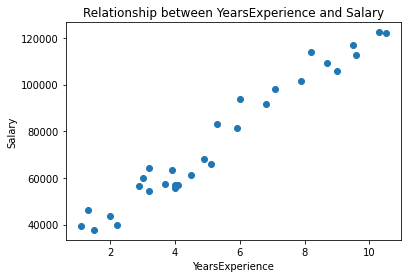

In [5]:
# Scatter plot and show relationship between expereience and salary

plt.scatter(df["YearsExperience"], df["Salary"])
plt.title("Relationship between YearsExperience and Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [6]:
# split the data 80% for training

num = int(len(df)*0.8)
train = df[:num]
test = df[num:]



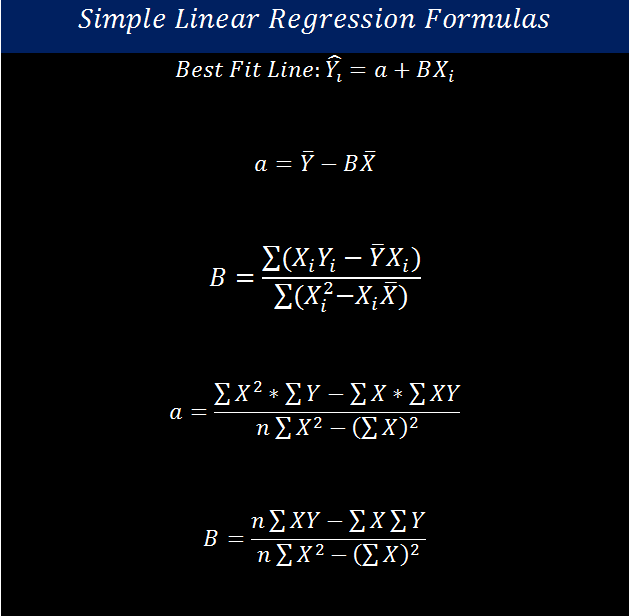

###Main function to calculate the coefficients of the linear best fit

In [7]:
# based on formula to get best fit line in linear regression

def simple_linear_regression(X, Y):
  # number of data
  n = len(X)

  # x bar
  X_mean = X.mean()

  # y bar
  Y_mean = Y.mean()

  # sum of x and y
  SUM_X = X.sum()
  SUM_Y = Y.sum()

  # sum of (X*Y) multiplied by n:
  SUM_XY= ((X*Y).sum())*n

  # sum of x * sum of y
  SUM_X_SUM_Y = SUM_X*SUM_Y

  # sum of (x*x) multiplied by n
  SUM_XX = ((X*X).sum())*n
  
  # square of sum of x
  SUM_X_Square = SUM_X*SUM_X 

  # slope
  slope = (SUM_XY- SUM_X_SUM_Y)/(SUM_XX- SUM_X_Square)

  intercept = Y_mean - slope *X_mean

  return slope,intercept




###Calculate Slope and Y_intercept


In [8]:
# calcualte bestfit slope and y intercept
# training the model with train data
actual_slope, actual_intercept = simple_linear_regression(train["YearsExperience"], train["Salary"])

In [9]:
print("Slope: ", actual_slope)
print("Y_intercept: ", actual_intercept)

Slope:  10052.786167455975
Y_intercept:  23659.848673040913


In [10]:
# defining prediction function
def get_regression_prediction(input, slope,intercept):
  pred_value = slope*input + intercept 
  return pred_value

In [11]:
# predicting values for whole dataset
y_pred = get_regression_prediction(df["YearsExperience"], actual_slope, actual_intercept)

In [ ]:
y_pred

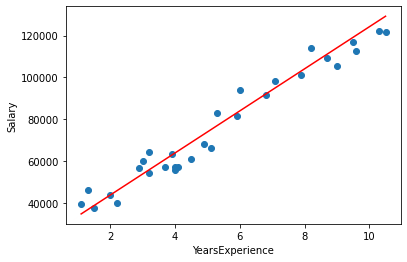

In [13]:
# plot the regression line with whole data

plt.scatter(df["YearsExperience"], df["Salary"])
plt.plot(df["YearsExperience"], y_pred, color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### Calculating SSE and MSE

In [14]:
# error calculating using sum of squares error

def sum_of_squares_error(input, output, slope, intercept):
  predict = slope*input + intercept
  residual = (output - predict)

  SSE = (residual*residual).sum()

  return SSE


In [15]:
SSE = sum_of_squares_error(df["YearsExperience"], df["Salary"],actual_slope, actual_intercept)
print("Sum of squre error: ", SSE)

Sum of squre error:  1057390424.8320996


In [16]:
# calculating mean square error
mse = mean_squared_error(df["Salary"], y_pred)

print("Mean squre error: ", mse)

Mean squre error:  35246347.49440332


#Simple Linear Regression Using Scikit-learn

In [17]:
df = pd.read_csv("/content/Salary_Data.csv")

In [18]:
# to using linear regression model
X= df["YearsExperience"].values.reshape(-1, 1)
Y= df["Salary"].values.reshape(-1, 1)

In [19]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=30)

In [20]:
regr = LinearRegression()

In [21]:
model = regr.fit(X_train, y_train)

###Calcuate Slope and Intercept

In [22]:
# Slope
print(regr.coef_[0])

[9846.5759533]


In [23]:
# Intercept
print(regr.intercept_)

[23278.82210193]


In [24]:
predicted_data = regr.predict(X_test)

In [25]:
predicted_data

array([[ 71527.04427312],
       [124698.55442095],
       [116821.29365831],
       [ 61680.46831981],
       [108944.03289567],
       [ 34110.05565056],
       [ 54787.8651525 ],
       [ 52818.54996184],
       [111898.00568166]])

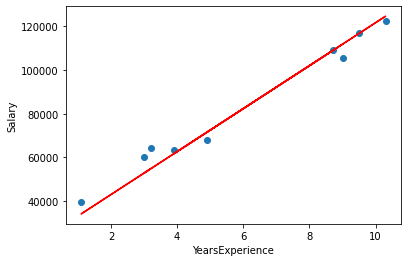

In [26]:
#Plot the regression line for testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, predicted_data, color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### Calculating SSE and MSE

In [27]:

print("Mean squared error: {}".format(mean_squared_error(y_test, predicted_data)))

Mean squared error: 26123894.60572844


In [28]:
res = predicted_data- y_test
RSS =(res*res).sum()

In [29]:
print("Residual sum of squares: ",  RSS)

Residual sum of squares:  235115051.45155597
